Reviewed on May 27th.   Marked as "complete" that this code should work once I re-run the PMF

In [1]:
import os
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import seaborn as sns 

# Notebook Options 
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import warnings
warnings.filterwarnings(action='once')

In [2]:
# matplotlib settings 

matplotlib.rcParams['text.usetex'] = True
matplotlib.rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})

months_ticks = mdates.MonthLocator()  # every month

In [3]:
%pwd

'/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/plotting_code'

## Loading the Data 
Here I load the `full_dataset.feather` from the folder `processed_data`.\
This includes the ACSM, Rolling Window PMF Outputs, and the meteorological data from ARM

In [4]:
plots_path = '/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/plotting_code'
os.chdir('/Users/shokawano/Box Sync/Zhang_Lab/code/sgp_analysis/')

In [5]:
data = pd.read_feather('data_processing/processed_data/full_dataset.feather')
data.utc_6 = pd.DatetimeIndex(data.utc_6)

In [6]:
data.set_index('utc_6', inplace=True)

In [7]:
# creating the NR-PM1 variable here. 
data['NR_PM1'] = data['Org'] + data['NH4'] + data['NO3'] + data['SO4'] + data['Chl']

This what the data looks like. 

In [8]:
data.head()

,acsm_utc_time,Org,NH4,SO4,NO3,Chl,OA_f1,OA_f2,OA_f3,u_wind,v_wind,rel_humidity,pressure,precip_rate,temp_K,temp_C,NR_PM1
utc_6,,,,,,,,,,,,,,,,,
2010-12-31 18:00:00,2011-01-01 00:00:00,0.105956,0.215098,0.121966,0.229458,0.003515,0.116915,0.020900,0.0,3.422397,-3.960911,59.724499,978.089722,0.0,266.566742,-6.583258,0.675994
2010-12-31 18:30:00,2011-01-01 00:30:00,0.060341,0.015342,0.239592,0.175130,0.009092,0.264805,0.038858,0.0,3.422397,-3.960911,59.724499,978.089722,0.0,266.566742,-6.583258,0.499496
2010-12-31 19:00:00,2011-01-01 01:00:00,0.376326,0.103007,0.133917,0.159480,0.012422,0.244734,0.011058,0.0,2.543428,-3.876014,60.967865,978.872375,0.0,265.453461,-7.696539,0.785151
2010-12-31 19:30:00,2011-01-01 01:30:00,0.172501,0.127982,0.096578,0.210620,0.006859,0.206102,0.093938,0.0,2.543428,-3.876014,60.967865,978.872375,0.0,265.453461,-7.696539,0.614539
2010-12-31 20:00:00,2011-01-01 02:00:00,0.198224,0.117998,0.104784,0.219591,0.009277,0.042235,0.060362,0.0,2.159948,-3.314372,64.871643,979.188416,0.0,264.232635,-8.917365,0.649874


Remove rows with 'Org' missing

In [9]:
data = data[~data['Org'].isna()]

/Users/shokawano/anaconda3/envs/zlab/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


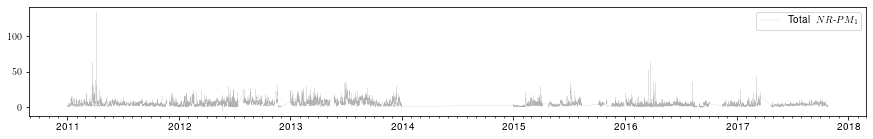

In [10]:
# just a plot of the raw data. 
plt.rcParams["figure.figsize"] = (15, 2)

fig, ax = plt.subplots(1, 1)

ax.plot(data['NR_PM1'], label=r'Total \, $NR \mbox{-} PM_1$', color='grey', alpha=0.6, linewidth=0.2)
ax.xaxis.set_minor_locator(months_ticks)
ax.legend()
plt.show()

In [11]:
data['NR_PM1'].max()

135.14245156373818

## Each Individual Subplot Used for Figure 1

Showing each of the subplots used to create figure 1. Want to separate it out for clarity. 

Below are some global settings/variables used for each figure to get rid of redundant code. 

In [12]:
plt.rcParams["figure.figsize"] = (15, 2)
plt_data = data.resample('2D').mean()

This is a plot that shows the raw data with the 48 hour average. 
It is a combination of two subplots: one that shows the data from -0.1 to 20 and the other that shows the outliers from 50 to 100. 

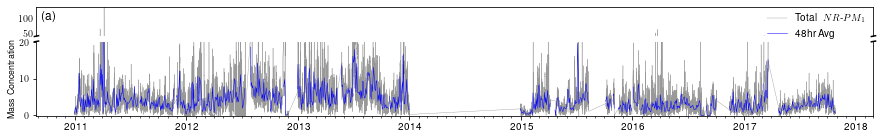

In [13]:
f1, (ax, ax2) = plt.subplots(2, 1, sharex=True, gridspec_kw={'height_ratios': [1, 2.5]})
ax2.xaxis.set_minor_locator(months_ticks)

# plot the raw data on both axes
ax.plot(data['NR_PM1'], label=r'Total \, $NR \mbox{-} PM_1$', color='grey', alpha=0.8, linewidth=0.4)
ax2.plot(data['NR_PM1'], label=r'Total \, $NR \mbox{-} PM_1$', color='grey', alpha=0.8, linewidth=0.4)

# plot the 48 hr avg data on both axes
ax.plot(plt_data['NR_PM1'], label='48hr Avg', color='blue', linewidth=0.5)
ax2.plot(plt_data['NR_PM1'], label='48hr Avg', color='blue', linewidth=0.5)

# Set the label 
ax2.set_ylabel('Mass Concentration ', fontsize=9)
# zoom-in / limit the view to different portions of the data
ax.set_ylim(40, 135)  # outliers only
ax2.set_ylim(plt_data['NR_PM1'].min(), 20)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# remove tick marks for the first plot 
ax.tick_params(which='both', length=0)
ax2.xaxis.tick_bottom()

# making breakmarks
d = 0.0025  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

ax.plot((-d, +d), (-d, +d*10), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d*10), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, (1 + d)*1.005 ), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, (1 + d)*1.005 ), **kwargs)  # bottom-right diagonal

# this is important 
f1.subplots_adjust(hspace=0.1)

ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.5), frameon=False)
ax.text(0.005, 0.55,'(a)', transform=ax.transAxes, fontsize=12)

plt.show()

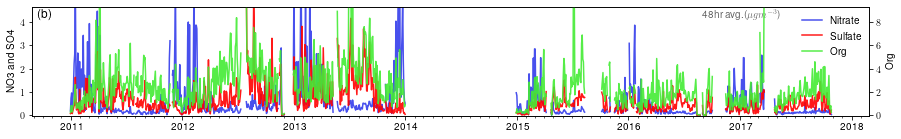

In [14]:
f2, ax3 = plt.subplots()
ax3.xaxis.set_minor_locator(months_ticks)
ax3.set_ylabel('NO3 and SO4')
no3 = ax3.plot(plt_data['NO3'], label='Nitrate', color='#343deb', alpha=0.9)
so4 = ax3.plot(plt_data['SO4'], label='Sulfate', color='red', alpha=0.9)

ax3.set_ylim(min(plt_data.NO3.min(), plt_data.SO4.min()), 
             max(plt_data.NO3.quantile(0.99), plt_data.SO4.quantile(0.99)))
ax3b = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax3b.set_ylabel('Org')  # we already handled the x-label with ax1
org = ax3b.plot(plt_data['Org'], label='Org', color='#43eb34', alpha=0.9)

ax3b.set_ylim(plt_data.Org.min(), plt_data.Org.quantile(0.99) )


lns = no3 + so4 + org
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=0, frameon=False)


ax3.text(0.005, 0.9,'(b)', transform=ax3.transAxes, fontsize=12)
ax3.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)',  alpha=0.6, transform=ax3.transAxes, fontsize=10)
plt.show()

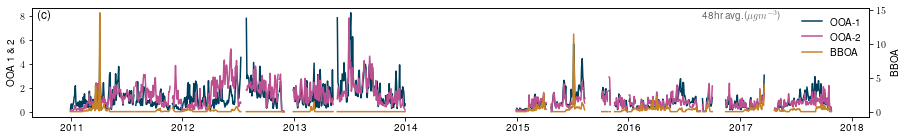

In [15]:
f3, ax4 = plt.subplots()
ax4.set_ylabel(r'OOA 1 \& 2')

ooa1 = ax4.plot(plt_data['OA_f1'], label='OOA-1', color='#003f5c')
ooa2 = ax4.plot(plt_data['OA_f2'], label='OOA-2',  color='#bc5090')

ax4b = ax4.twinx()  # instantiate a second axes that shares the same x-axis

ax4b.set_ylabel('BBOA')  # we already handled the x-label with ax1
bboa = ax4b.plot(plt_data['OA_f3'], label='BBOA', color='#c48327')

ax4.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)', alpha=0.6, transform=ax4.transAxes, fontsize=10)
ax4.text(0.005, 0.9,'(c)', transform=ax4.transAxes, fontsize=12)

lns = ooa1 + ooa2 + bboa
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs, loc=0, frameon=False)
plt.show()

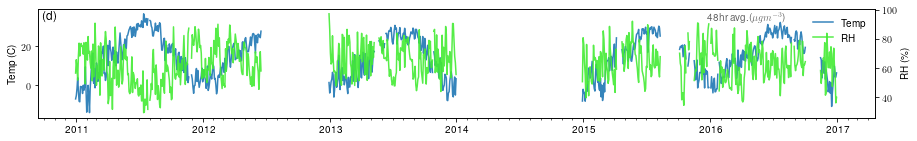

In [16]:
f4, ax5 = plt.subplots()

ax5.xaxis.set_minor_locator(months_ticks)
ax5.set_ylabel(r'Temp (C)')
temp = ax5.plot(plt_data['temp_C'], label='Temp', alpha=0.9)
ax5b = ax5.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax5b.set_ylabel(r'RH (\%)')  # we already handled the x-label with ax1
rh = ax5b.plot(plt_data['rel_humidity'], color='#43eb34', label='RH', alpha=0.9)

lns = temp + rh
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc=0, frameon=False)

ax5b.text(0.005, 0.9,'(d)', transform=ax5b.transAxes, fontsize=12)
ax5.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)', alpha=0.6, transform=ax5.transAxes, fontsize=10)


plt.show()

## Combining Plots to Create a Giant Plot 

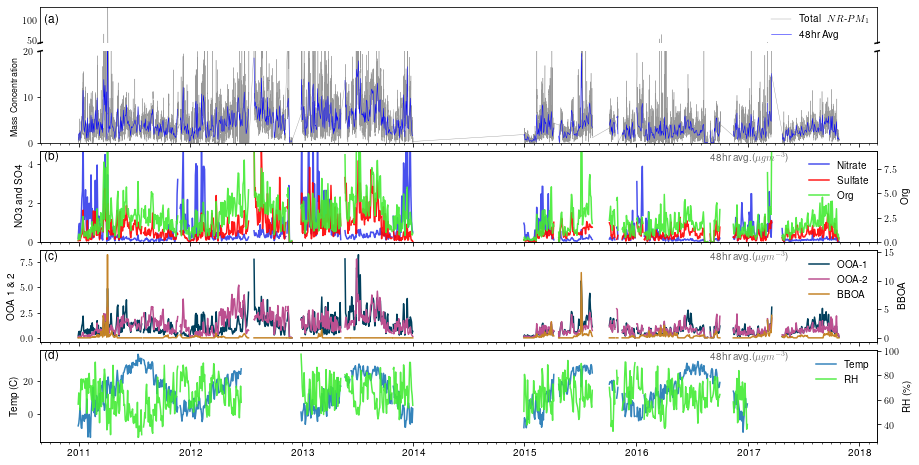

In [17]:
plt.rcParams["figure.figsize"] = (15, 8)
f1, (ax, ax2, ax3, ax4, ax5) = plt.subplots(5, 1, sharex=True, 
                                            gridspec_kw={'height_ratios': [1, 2.5, 2.5, 2.5, 2.5]})


# -------------- PLOT 1 --------------
ax2.xaxis.set_minor_locator(months_ticks)
# plot the raw data on both axes
ax.plot(data['NR_PM1'], label=r'Total \, $NR \mbox{-} PM_1$', color='grey', alpha=0.8, linewidth=0.4)
ax2.plot(data['NR_PM1'], label=r'Total \, $NR \mbox{-} PM_1$', color='grey', alpha=0.8, linewidth=0.4)

# plot the 48 hr avg data on both axes
ax.plot(plt_data['NR_PM1'], label='48hr Avg', color='blue', linewidth=0.5)
ax2.plot(plt_data['NR_PM1'], label='48hr Avg', color='blue', linewidth=0.5)

# Set the label 
ax2.set_ylabel('Mass Concentration ', fontsize=9)
# zoom-in / limit the view to different portions of the data
ax.set_ylim(40, 135)  # outliers only
ax2.set_ylim(plt_data['NR_PM1'].min(), 20)  # most of the data

# hide the spines between ax and ax2
ax.spines['bottom'].set_visible(False)
ax2.spines['top'].set_visible(False)

# remove tick marks for the first plot 
ax.tick_params(which='both', length=0)
ax2.xaxis.tick_bottom()

# making breakmarks
d = 0.0025  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=ax.transAxes, color='k', clip_on=False)

ax.plot((-d, +d), (-d, +d*10), **kwargs)        # top-left diagonal
ax.plot((1 - d, 1 + d), (-d, +d*10), **kwargs)  # top-right diagonal

kwargs.update(transform=ax2.transAxes)  # switch to the bottom axes
ax2.plot((-d, +d), (1 - d, (1 + d)*1.005 ), **kwargs)  # bottom-left diagonal
ax2.plot((1 - d, 1 + d), (1 - d, (1 + d)*1.005 ), **kwargs)  # bottom-right diagonal

# this is important 
f1.subplots_adjust(hspace=0.1)

ax2.legend(loc='upper right', bbox_to_anchor=(1, 1.5), frameon=False)
ax.text(0.005, 0.55,'(a)', transform=ax.transAxes, fontsize=12)

# -------------- PLOT 2 --------------
ax3.xaxis.set_minor_locator(months_ticks)
ax3.set_ylabel('NO3 and SO4')
no3 = ax3.plot(plt_data['NO3'], label='Nitrate', color='#343deb', alpha=0.9)
so4 = ax3.plot(plt_data['SO4'], label='Sulfate', color='red', alpha=0.9)

ax3.set_ylim(min(plt_data.NO3.min(), plt_data.SO4.min()), 
             max(plt_data.NO3.quantile(0.99), plt_data.SO4.quantile(0.99)))
ax3b = ax3.twinx()  # instantiate a second axes that shares the same x-axis

ax3b.set_ylabel('Org')  # we already handled the x-label with ax1
org = ax3b.plot(plt_data['Org'], label='Org', color='#43eb34', alpha=0.9)

ax3b.set_ylim(plt_data.Org.min(), plt_data.Org.quantile(0.99) )


lns = no3 + so4 + org
labs = [l.get_label() for l in lns]
ax3.legend(lns, labs, loc=0, frameon=False)


ax3.text(0.005, 0.9,'(b)', transform=ax3.transAxes, fontsize=12)
ax3.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)',  alpha=0.6, transform=ax3.transAxes, fontsize=10)

# -------------- PLOT 3 --------------

ax4.set_ylabel(r'OOA 1 \& 2')

ooa1 = ax4.plot(plt_data['OA_f1'], label='OOA-1', color='#003f5c')
ooa2 = ax4.plot(plt_data['OA_f2'], label='OOA-2',  color='#bc5090')

ax4b = ax4.twinx()  # instantiate a second axes that shares the same x-axis

ax4b.set_ylabel('BBOA')  # we already handled the x-label with ax1
bboa = ax4b.plot(plt_data['OA_f3'], label='BBOA', color='#c48327')

ax4.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)', alpha=0.6, transform=ax4.transAxes, fontsize=10)
ax4.text(0.005, 0.9,'(c)', transform=ax4.transAxes, fontsize=12)

lns = ooa1 + ooa2 + bboa
labs = [l.get_label() for l in lns]
ax4.legend(lns, labs, loc=0, frameon=False)

# -------------- PLOT 4 --------------
ax5.xaxis.set_minor_locator(months_ticks)
ax5.set_ylabel(r'Temp (C)')
temp = ax5.plot(plt_data['temp_C'], label='Temp', alpha=0.9)
ax5b = ax5.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax5b.set_ylabel(r'RH (\%)')  # we already handled the x-label with ax1
rh = ax5b.plot(plt_data['rel_humidity'], color='#43eb34', label='RH', alpha=0.9)

lns = temp + rh
labs = [l.get_label() for l in lns]
ax5.legend(lns, labs, loc=0, frameon=False)

ax5b.text(0.005, 0.9,'(d)', transform=ax5b.transAxes, fontsize=12)
ax5.text(0.80, 0.9, '48hr avg.' r'($\mu g m^{-3}$)', alpha=0.6, transform=ax5.transAxes, fontsize=10)


# -------------- Final Touches --------------


plt.savefig('plotting_code/outline_plots/figure1.png', dpi=300, bbox_inches='tight')
plt.show()